In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df['price_range'].describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [9]:
df.size

42000

In [10]:
tdf=df.corr()

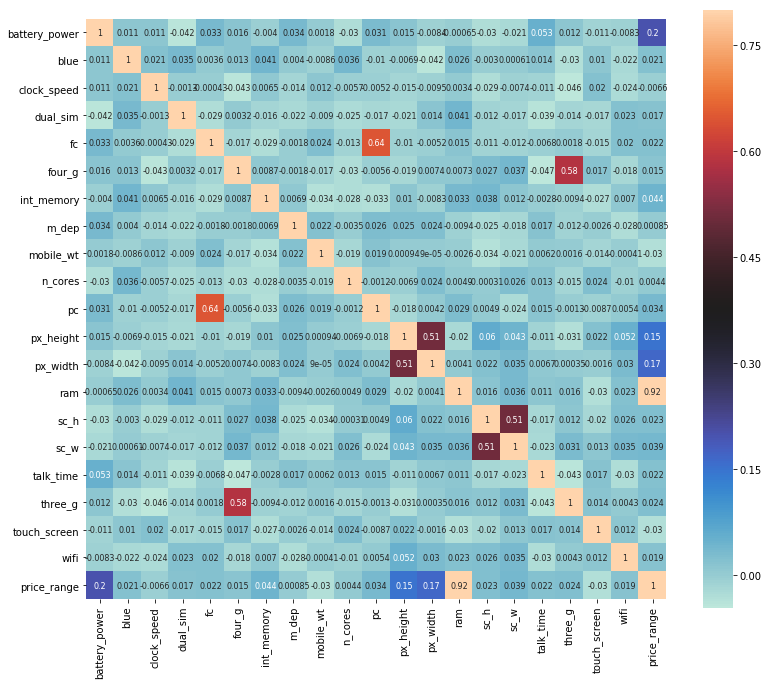

In [11]:
f,ax=plt.subplots(figsize=(13,11))
sns.heatmap(tdf,vmax=0.8,square=True,annot=True,
           annot_kws={'size':8},cmap='icefire')

#vmax sets the max value of indeex
#annot gives the representation of the number on each square as true 
#annot_kws is used only for setting the size of the box

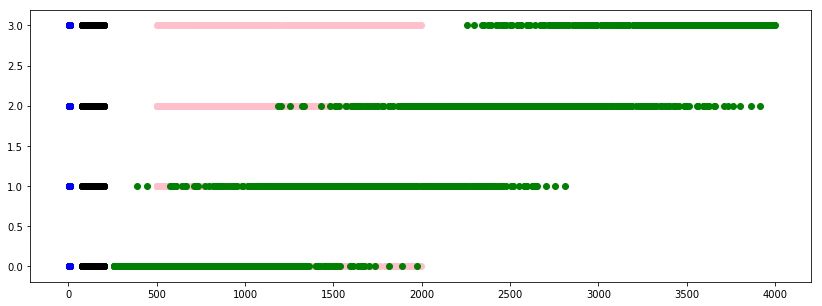

In [12]:
f,ax=plt.subplots(figsize=(14,5))
plt.scatter(y=df['price_range'],x=df['battery_power'],color='pink')
plt.scatter(y=df['price_range'],x=df['ram'],color='Green')
plt.scatter(y=df['price_range'],x=df['n_cores'],color='Blue')
plt.scatter(y=df['price_range'],x=df['mobile_wt'],color='black')

### Support Vector Machine

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_target=np.array(df['price_range'])
x_target=df

x_target=df.drop(['price_range'],axis=1)
x_target=np.array(x_target)

print("shape of y ",str(y_target.shape))
print("shape of x",str(x_target.shape))

shape of y  (2000,)
shape of x (2000, 20)


In [14]:
#scaling the train datasets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_target=scaler.fit_transform(x_target)

In [15]:
x_target[:2]

array([[0.22778891, 0.        , 0.68      , 0.        , 0.05263158,
        0.        , 0.08064516, 0.55555556, 0.9       , 0.14285714,
        0.1       , 0.01020408, 0.17089453, 0.61277392, 0.28571429,
        0.38888889, 0.94444444, 0.        , 0.        , 1.        ],
       [0.34736139, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.82258065, 0.66666667, 0.46666667, 0.28571429,
        0.3       , 0.46173469, 0.99332443, 0.63468733, 0.85714286,
        0.16666667, 0.27777778, 1.        , 1.        , 0.        ]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_target,y_target,test_size=.20,random_state=100)

In [17]:
print('shape of X_train', str(x_train.shape))
print('shape of Y_train', str(y_train.shape))
print('shape of X_test', str(x_test.shape))
print('shape of Y_test', str(y_test.shape))

shape of X_train (1600, 20)
shape of Y_train (1600,)
shape of X_test (400, 20)
shape of Y_test (400,)


### training

In [18]:
for cvalue in [1,3,5,6,7,8,9,10,12,14]:
    clf=SVC(kernel='linear',C=cvalue).fit(x_train,y_train)
    score_train=clf.score(x_train,y_train)
    score_test=clf.score(x_test,y_test)
    print('SVM value on c {} training score :{:2f} testcore :{:2f}'.format(cvalue,score_train,score_test))

SVM value on c 1 training score :0.961250 testcore :0.925000
SVM value on c 3 training score :0.973125 testcore :0.950000
SVM value on c 5 training score :0.971875 testcore :0.955000
SVM value on c 6 training score :0.971250 testcore :0.957500
SVM value on c 7 training score :0.972500 testcore :0.957500
SVM value on c 8 training score :0.971875 testcore :0.960000
SVM value on c 9 training score :0.970625 testcore :0.965000
SVM value on c 10 training score :0.975625 testcore :0.962500
SVM value on c 12 training score :0.976875 testcore :0.957500
SVM value on c 14 training score :0.975625 testcore :0.955000


### testing the model with cross validation

### K-Fold cross validation

Kfold that returns stratified folds-> The fold are made by preserving the percentage of samples for each class 

In [19]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut

In [20]:
clf1=SVC(kernel='linear',C=5).fit(x_train,y_train)
score=cross_val_score(clf1,x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [21]:
score

array([0.94392523, 0.94194757, 0.96233522])

In [22]:
strat_Score=cross_val_score(clf1,x_train,y_train,cv=StratifiedKFold(5,random_state=1,shuffle=True))

In [23]:
# lets print output
print("The cross validartion score",str(score))
print("The avg cross validarion score",str(score.mean()))
print("The StratifiedKFold validation score",str(strat_Score))
print("the avg StratifiedKFold validation score",str(strat_Score.mean()))

The cross validartion score [0.94392523 0.94194757 0.96233522]
The avg cross validarion score 0.9494026719201453
The StratifiedKFold validation score [0.95327103 0.959375   0.9625     0.95625    0.94357367]
the avg StratifiedKFold validation score 0.9549939391497964


In [24]:
x=np.array(df.iloc[:,[0,13]])
y=np.array(df['price_range'])
print("shape of x and y ",x.shape,y.shape)

shape of x and y  (2000, 2) (2000,)


In [25]:
x=scaler.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

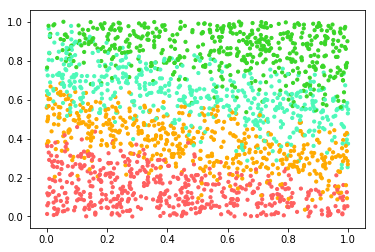

In [32]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

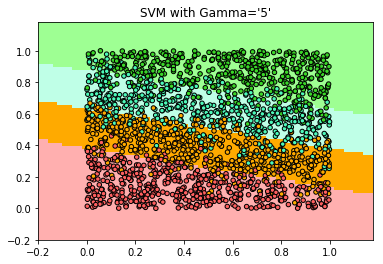

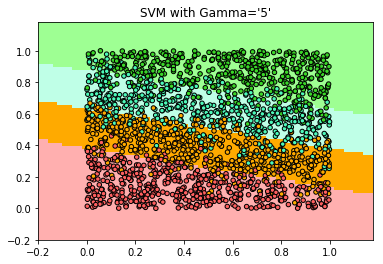

In [33]:
h=.02 #size of the mesh 
C_parm=5
for w in ['uniform','distance']:
    clf1=SVC(kernel='linear',C=C_parm)
    clf1.fit(x,y)
    #plot decision boundry
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
    y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    z=clf1.predict(np.c_[xx.ravel(),yy.ravel()])
    #put everything on graph
    z=z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,z,cmap=cm_bright)
    #plot the training point
    plt.scatter(x[:,0],x[:,1],c=y,cmap=cm_dark,edgecolor='k',s=20)
    plt.xlim(xx.min(),yy.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("SVM with Gamma='%s'"%(C_parm))
plt.show()

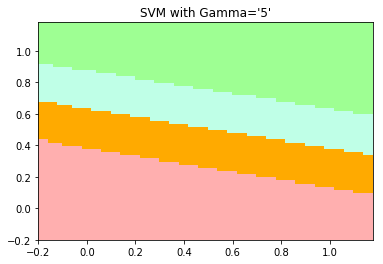

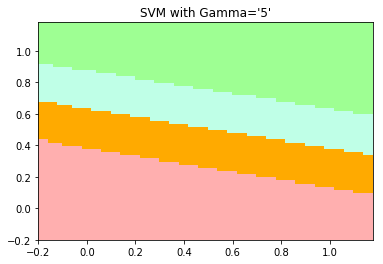

In [37]:
# checking for meshgrid
h=.02 #size of the mesh 
C_parm=5
for w in ['uniform','distance']:
    clf1=SVC(kernel='linear',C=C_parm)
    clf1.fit(x,y)
    #plot decision boundry
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = x[:, 0].min()-.20, x[:, 0].max()+.20
    y_min, y_max = x[:, 1].min()-.20, x[:, 1].max()+.20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    z=clf1.predict(np.c_[xx.ravel(),yy.ravel()])
    #put everything on graph
    z=z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,z,cmap=cm_bright)
    #plot the training point
    #plt.scatter(x[:,0],x[:,1],c=y,cmap=cm_dark,edgecolor='k',s=20)
    plt.xlim(xx.min(),yy.max())
    plt.ylim(yy.min(),yy.max())
    plt.title("SVM with Gamma='%s'"%(C_parm))
plt.show()

In [38]:
### Precdiction

In [39]:
test_cacl=np.array(x_test)
testm=scaler.fit_transform(test_cacl)
clf4=SVC(kernel='linear',C=5,gamma=.1).fit(x_train,y_train)
prediction=clf4.predict(testm)
pred=pd.DataFrame(prediction)
pred.head()

,0
0,0
1,2
2,1
3,3
4,2
